<a href="https://colab.research.google.com/github/lucila-03/Acidente/blob/main/MVP2INSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP para Análise de Informações do INSS
## Lucila da Conceição Castello Branco


    ###Separe o dataset entre treino e teste (e validação, se aplicável).
    Faz sentido utilizar um método de validação cruzada? Justifique se não utilizar.
    Verifique quais operações de transformação de dados (como normalização e padronização, transformação de imagens em tensores) são mais apropriadas para o seu problema e salve visões diferentes do seu dataset para posterior avaliação dos modelos.
    Refine a quantidade de atributos disponíveis, realizando o processo de feature selection de forma adequada.

## 1. Definição do Problema *

O dataset usado neste projeto será um arquivo do governo com informações da Comunicação de Acidentes de Trabalho (CAT), são somente as informações que governo disponibiliza, o arquivo estava guardado e foi modificado para ter somente informações relevantes para análise de acidentes de Janeiro e Fevereiro de 2019. O objetivo deste projeto é conhecer os tipos de acidentados em janeiro e fevereiro de 2019.

**Informações sobre os atributos:**
1. **Data Acidente** - Mês e ano da ocorrência
2. **Parte Corpo** - parte do corpo lesionado
3. **Sexo** - Masculino / Feminino
4. **Tipo de acidente** - Os acidentes são classificados conforme o tipo de ocorrência, pode ser típicos ( quando ocorreu na execução do trabalho) ou trajeto ( em deslocamento entre trabalho e casa ou deslocamento no almoço)
5. **UF  Munic.  Acidente** - localização(Estado) que o funcionário estava quando se acidentou.
6. **UF Munic. Empregador** - localização(Estado) que a empresa trabalha
7. **Idade** - idade (anos) do acidentado no dia so acidente

In [1]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from pandas.core.dtypes.common import is_int64_dtype
from matplotlib import cm
from sklearn.preprocessing import OneHotEncoder
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier


## 2. Carga de Dados

In [2]:
# Carrega arquivo csv usando Pandas usando uma URL

# Importação do dataset

url = "https://raw.githubusercontent.com/lucila-03/Acidente/main/dataset%20cat.csv"
dataset = pd.read_csv(url, delimiter = ";", encoding='ISO-8859-1' )

## 3. Análise de Dados e tratamento

Será realizado um levantamento dos tipos de dados, análise e ajustes para que a base de dados fique pronta para o estudo.

In [3]:
# Mostra as dimensões do dataset
dataset.shape

(77985, 7)

In [4]:
# Mostra as informações do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77985 entries, 0 to 77984
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Data Acidente         77985 non-null  object
 1   Parte Corpo Atingida  77985 non-null  object
 2   Sexo                  77985 non-null  object
 3   Tipo do Acidente      77985 non-null  object
 4   UF  Munic.  Acidente  54146 non-null  object
 5   UF Munic. Empregador  77985 non-null  object
 6   Idade                 77985 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 4.2+ MB


Foi identificado que os Estados dos acidentados apresentam inconsistências que precisam ser tratadas.
Saber o lugar (Estado) em que o colaborador se acidentou é um a informação relevante, com a ausência da informação, será utilizado o estado em que a empresa está localizada.

In [5]:
# Função personalizada para substituir os dados sem informação
dataset['UF  Munic.  Acidente'] = dataset['UF  Munic.  Acidente'].fillna(dataset['UF Munic. Empregador'])

dataset.head(5)

,Data Acidente,Parte Corpo Atingida,Sexo,Tipo do Acidente,UF Munic. Acidente,UF Munic. Empregador,Idade
0,2019/01,Dedo,Feminino,Típico,Espírito Santo,Espírito Santo,23
1,2019/01,Antebraco (Entre O P,Masculino,Típico,Rio Grande do Sul,Rio Grande do Sul,26
2,2019/01,Dorso (Inclusive Mus,Feminino,Trajeto,Pará,Pernambuco,35
3,2019/01,Dedo,Feminino,Típico,Rondônia,Minas Gerais,30
4,2019/01,"Face, Partes Multipl",Feminino,Típico,Rio Grande do Sul,Rio Grande do Sul,32


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77985 entries, 0 to 77984
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Data Acidente         77985 non-null  object
 1   Parte Corpo Atingida  77985 non-null  object
 2   Sexo                  77985 non-null  object
 3   Tipo do Acidente      77985 non-null  object
 4   UF  Munic.  Acidente  77985 non-null  object
 5   UF Munic. Empregador  77985 non-null  object
 6   Idade                 77985 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 4.2+ MB


Para dar andamento ao projeto seria interessante conhecer a amplitude de informações do dataset.

In [7]:
# Faz o levantamento de todas as opções das colunas

for column in dataset.columns:
    unique_options = dataset[column].unique()
    print(f"{column}")
    print(unique_options)
    print()

Data Acidente
['2019/01' '2019/02']

Parte Corpo Atingida
['Dedo                ' 'Antebraco (Entre O P' 'Dorso (Inclusive Mus'
 'Face, Partes Multipl' 'Mao (Exceto Punho ou' 'Torax (Inclusive Org'
 'Membros Superiores, ' 'Membros Inferiores, ' 'Sistema Musculo-Esqu'
 'Olho (Inclusive Nerv' 'Pe (Exceto Artelhos)' 'Joelho              '
 'Perna (Entre O Torno' 'Artelho             ' 'Articulacao do Torno'
 'Cotovelo            ' 'Braco (Entre O Punho' 'Ombro               '
 'Cabeca, Nic         ' 'Tronco, Nic         ' 'Nariz (Inclusive Fos'
 'Pescoco             ' 'Punho               ' 'Cabeca, Partes Multi'
 'Perna (Do Tornozelo,' 'Braco (Acima do Coto' 'Sistemas e Aparelhos'
 'Partes Multiplas - A' 'Sistema Nervoso     ' 'Coxa                '
 'Abdome (Inclusive Or' 'Quadris (Inclusive P' 'Boca (Inclusive Labi'
 'Mandibula (Inclusive' 'Ouvido (Externo, Med' 'Cranio (Inclusive En'
 'Tronco, Parte Multip' 'Aparelho Respiratori' 'Aparelho Circulatori'
 'Aparelho Genito-Urin' 'Aparelh

Análise de cada uma das colunas:

Data: são dois meses, não há necessidade de ajustes.
Parte Corpo Atingida: existem muitas variações, agrupar alguns membros pode ser uma opção interessante para que as informações não fiquem muito coplexas.
Sexo: diferenciação por sexo pode ser interesante, mas indeterminado e não informado podem ser agrupados para não segregar informações.
Tipo de Acidentes e UF não há necessidade de ajustes.
Idade: no campo idade há ums diversidade de informações desnecessárias, podem ser agrupadas.

In [8]:
# Para facilitar o processamento algumas colunas serão agrupadas

# Função para agrupar as partes do corpo
def agrupar_parte_corpo(valor):
    if valor in ['Face, Partes Multipl', 'Olho (Inclusive Nerv','Cabeca, Nic         ', 'Mandibula (Inclusive','Ouvido (Externo, Med',
                 'Cranio (Inclusive En', 'Nariz (Inclusive Fos', 'Cabeca, Partes Multi', 'Boca (Inclusive Labi']:
        return 'Cabeça'
    elif valor in ['Mao (Exceto Punho ou', 'Dedo                ']:
        return 'Mão'
    elif valor in ['Torax (Inclusive Org', 'Tronco, Nic         ', 'Quadris (Inclusive P','Abdome (Inclusive Or',
                  'Tronco, Parte Multip', 'Ombro               ', 'Dorso (Inclusive Mus']:
        return 'Tronco'
    elif valor in ['Membros Inferiores, ', 'Joelho              ', 'Perna (Entre O Torno', 'Artelho             ', 'Perna (Do Tornozelo,',
                    'Articulacao do Torno', 'Coxa                ']:
        return 'Membros Inferiores'
    elif valor in ['Sistema Musculo-Esqu', 'Aparelho Respiratori', 'Aparelho Circulatori', 'Aparelho Genito-Urin', 'Aparelho Digestivo',
                     'Partes Multiplas - A', 'Sistema Nervoso     ', 'Sistemas e Aparelhos']:
        return 'Partes Multiplas'
    elif valor in ['Antebraco (Entre O P', 'Cotovelo            ', 'Braco (Entre O Punho', 'Braco (Acima do Coto', 'Punho               ',
                    'Membros Superiores, ']:
        return 'Membros Superiores'
    elif valor in ['Pe (Exceto Artelhos)']:
        return 'Pe'
    elif valor in ['Pescoco             ']:
        return 'Pescoço'
    else:
        return 'Outros'

# Aplicar a função à coluna 'Parte do Corpo' e criar uma nova coluna
pd.DataFrame(dataset)['Local Corpo'] = pd.DataFrame(dataset)['Parte Corpo Atingida'].apply(agrupar_parte_corpo)

# Função para ajustar coluna sexo
def agrupar_sexo(valor):
    if valor in ['Masculino           ']:
        return 'Masculino'
    elif valor in ['Feminino            ']:
        return 'Feminino'
    else:
        return 'Não Informado'

# Aplicar a função à coluna 'Sexo' e criar uma nova coluna
pd.DataFrame(dataset)['Sexo1'] = pd.DataFrame(dataset)['Sexo'].apply(agrupar_sexo)

# Função para ajustar coluna Idade
def agrupar_idade(valor):
    if valor <= 19:
        return '0 - 19'
    elif valor <= 29:
        return '20 - 29'
    elif valor <= 39:
        return '30 - 39'
    elif valor <= 49:
        return '40 - 49'
    elif valor <= 59:
        return '50 - 59'
    else:
        return '60 - 100'

# Aplicar a função à coluna 'Idade' e criar uma nova coluna
pd.DataFrame(dataset)['Faixa Etaria'] = pd.DataFrame(dataset)['Idade'].apply(agrupar_idade)


In [9]:
# Eliminando colunas desnecessárias

# Criando uma cópia do dataset
dados = dataset.copy()

# Removendo as colunas desejadas na cópia do dataset
remover_colunas = ['Data Acidente', 'Parte Corpo Atingida', 'Sexo', 'UF Munic. Empregador', 'Idade']
dados = dados.drop(remover_colunas, axis=1)

Faz-se necessária a aplicação do One Hot Encoding porque os dados são categoricos

In [10]:
# Transformando os dados categoricos em valores
dados_ohe = pd.get_dummies(dados)

# Dimensão do dataset
print(dados_ohe.shape)


(77985, 48)


In [11]:
dados_ohe.head()

,Tipo do Acidente_Trajeto,Tipo do Acidente_Típico,UF Munic. Acidente_Acre,UF Munic. Acidente_Alagoas,UF Munic. Acidente_Amapá,UF Munic. Acidente_Amazonas,UF Munic. Acidente_Bahia,UF Munic. Acidente_Ceará,UF Munic. Acidente_Distrito Federal,UF Munic. Acidente_Espírito Santo,...,Local Corpo_Tronco,Sexo1_Feminino,Sexo1_Masculino,Sexo1_Não Informado,Faixa Etaria_0 - 19,Faixa Etaria_20 - 29,Faixa Etaria_30 - 39,Faixa Etaria_40 - 49,Faixa Etaria_50 - 59,Faixa Etaria_60 - 100
0,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0


### 4.2. Separação em conjunto de treino e conjunto de teste

In [12]:
# Adição da coluna target para análise
dados_ohe['Target1'] = dataset['Local Corpo']
def agrupar_Local_Corpo(valor):
    if valor in ['Cabeça']:
        return 1
    elif valor in ['Mão']:
        return 5
    elif valor in ['Tronco']:
        return 3
    elif valor in ['Membros Inferiores']:
        return 6
    elif valor in ['Partes Multiplas']:
        return 7
    elif valor in ['Membros Superiores']:
        return 4
    elif valor in ['Pe']:
        return 8
    elif valor in ['Pescoço']:
        return 2
    else:
        return 9


# Aplicar a função à coluna 'Idade' e criar uma nova coluna
pd.DataFrame(dados_ohe)['Target'] = pd.DataFrame(dados_ohe)['Target1'].apply(agrupar_Local_Corpo)

dados_ohe.head()

,Tipo do Acidente_Trajeto,Tipo do Acidente_Típico,UF Munic. Acidente_Acre,UF Munic. Acidente_Alagoas,UF Munic. Acidente_Amapá,UF Munic. Acidente_Amazonas,UF Munic. Acidente_Bahia,UF Munic. Acidente_Ceará,UF Munic. Acidente_Distrito Federal,UF Munic. Acidente_Espírito Santo,...,Sexo1_Masculino,Sexo1_Não Informado,Faixa Etaria_0 - 19,Faixa Etaria_20 - 29,Faixa Etaria_30 - 39,Faixa Etaria_40 - 49,Faixa Etaria_50 - 59,Faixa Etaria_60 - 100,Target1,Target
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,Mão,5
1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,Membros Superiores,4
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,Tronco,3
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,Mão,5
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,Cabeça,1


In [13]:
# Remover_Target1 = ['Target1']
dados_ohe = dados_ohe.drop('Target1', axis=1)

# Dimensão do dataset
print(dados_ohe.shape)

(77985, 49)


#Criação e avaliação do modelo



In [14]:


# Separação em bases de treino e teste (holdout)
array = dados_ohe.values
X = array[:,0:48] # atributos
y = array[:,48] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7) # faz a divisão

# Validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

Modelagem dos dados

KNN: 0.998095 (0.000435)
CART: 1.000000 (0.000000)
NB: 0.999963 (0.000073)
SVM: 1.000000 (0.000000)


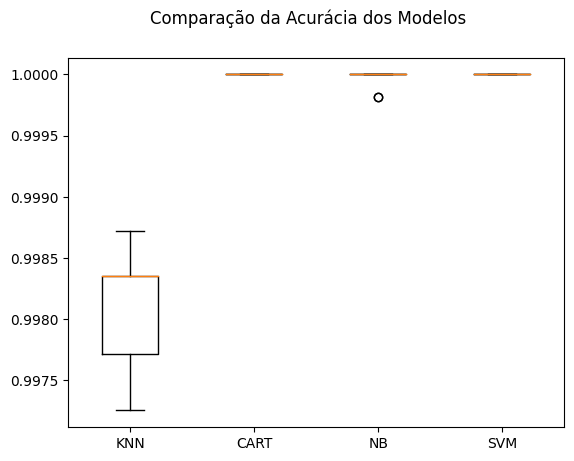

In [15]:
# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', MultinomialNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Com base nos resultados apresentados, todos parecem bons, mas a acurácia de 100% foram a Árvore de Decisão, Naive Bayes e SVM.
O escolhido foi a Naive de Bayes porque o SVM demora muito para rodar e a Árvore de Decisão pode levar ao overfitting, os dados são muito variados, já Naive de Bayes trata cada atributo de forma independente.

In [16]:

# Criando um modelo com todo o conjunto de treino
model = MultinomialNB()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

1.0


Ver ML_Aula3b fala do feature selection

### Criação e avaliação de modelos: dados padronizados e normalizados

In [17]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

NameError: ignored

In [ ]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = LogisticRegression(max_iter=200)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

## 4. Pré-Processamento de dados

Nesta etapa, poderíamos realizar diversas operações de preparação de dados, como por exemplo, tratamento de valores missings (faltantes), limpeza de dados, transformações como one-hot-encoding, seleção de características (feature selection), entre outras não mostradas neste notebook. Lembre-se de não criar uma versão padronizada/normalizada dos dados neste momento (apesar de serem operações de pré-processamento) para evitar o Data Leakage.

### 4.2. Separação em conjunto de treino e conjunto de teste

É uma boa prática usar um conjunto de teste (na literatura também chamado de conjunto de validação), uma amostra dos dados que não será usada para a construção do modelo, mas somente no fim do projeto para confirmar a precisão do modelo final. É um teste que podemos usar para verificar o quão boa foi a construção do modelo, e para nos dar uma ideia de como o modelo irá performar nas estimativas em dados não vistos. Usaremos 80% do conjunto de dados para modelagem e guardaremos 20% para teste, usando a estratégia train-test-split, já explicada anteriormente. Primeiramente, iremos sinalizar quais são as colunas de atributos (X - 0 a 7) e qual é a coluna das classes (Y - 8). Em seguida, especificaremos o tamanho do conjunto de teste desejado e uma semente (para garantir a reprodutibilidade dos resultados). Finalmente, faremos a separação dos conjuntos de treino e teste através do comando train_test_split, que retornará 4 estruturas de dados: os atributos e classes para o conjunto de teste e os atributos e classes para o conjunto de treino.


In [ ]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = dataset.values
X = array[:,0:13] # atributos
y = array[:,13] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds